In [39]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

In [40]:
df= pd.read_csv('Dataset_A_loan.csv')

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [42]:
df.loan_status.value_counts()

,count
loan_status,
0,35000
1,10000


PREPROCESSING


In [43]:
x= df[df.columns.drop(['loan_status'])]
y= df['loan_status']

In [44]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [45]:
print('Null Values in x train')
print(x_train.isnull().sum())

Null Values in x train
person_age                           0
person_gender                        0
person_education                     0
person_income                     1769
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
dtype: int64


In [46]:
x_train['person_income'].fillna(x_train['person_income'].median(), inplace= True)

x_test['person_income'].fillna(x_test['person_income'].median(), inplace= True)

<ipython-input-46-c1103f6e9339>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['person_income'].fillna(x_train['person_income'].median(), inplace= True)
<ipython-input-46-c1103f6e9339>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [47]:
print('Null Values in x train')
print(x_train.isnull().sum())

Null Values in x train
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64


DUPLICATE HANDLE

In [48]:
print(x_train.duplicated().sum())

0


In [49]:
category = x_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical = x_train.select_dtypes(include=['number']).columns.tolist()

print(f"Kolom Categorical: {category}")
print(f"Kolom Numerical: {numerical}")


Kolom Categorical: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Kolom Numerical: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [50]:
unique_values = {col: x_train[col].unique().tolist() for col in category}
print(unique_values)

{'person_gender': ['female', 'male', 'fe male', 'Male'], 'person_education': ['Bachelor', 'High School', 'Master', 'Associate', 'Doctorate'], 'person_home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'OTHER'], 'loan_intent': ['PERSONAL', 'VENTURE', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'DEBTCONSOLIDATION'], 'previous_loan_defaults_on_file': ['No', 'Yes']}


GENDER HANDLE VALUE

In [51]:
x_train['person_gender']= x_train['person_gender'].str.lower().str.replace(" ", "").replace({"fe male": "female"})
x_test['person_gender']= x_test['person_gender'].str.lower().str.replace(" ", "").replace({"fe male": "female"})

LOAN INTENT HANDLE VALUE

In [52]:
x_train['loan_intent']= x_train['loan_intent'].replace({
  'DEBTCONSOLIDATION': 'DEBT CONSOLIDATION',
  'HOMEIMPROVEMENT': 'HOME IMPROVEMENT'
})

x_test['loan_intent']= x_test['loan_intent'].replace({
  'DEBTCONSOLIDATION': 'DEBT CONSOLIDATION',
  'HOMEIMPROVEMENT': 'HOME IMPROVEMENT'
})

BIAR KATA2nya tidak capital

In [53]:
for col in category:
  x_train[col]= x_train[col].astype(str).str.strip().str.title()
  x_test[col]= x_test[col].astype(str).str.strip().str.title()

CHECK

In [54]:
for i in category:
  print(x_train[i].value_counts(), '\n')

person_gender
Male      19817
Female    16183
Name: count, dtype: int64 

person_education
Bachelor       10772
Associate       9607
High School     9508
Master          5609
Doctorate        504
Name: count, dtype: int64 

person_home_ownership
Rent        18727
Mortgage    14795
Own          2379
Other          99
Name: count, dtype: int64 

loan_intent
Education             7381
Medical               6818
Venture               6227
Personal              6030
Debt Consolidation    5731
Home Improvement      3813
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    18253
No     17747
Name: count, dtype: int64 



ENCODING

UBAH MALE JADI 1 DAN FEMALE 0 KARENA HARUS NUMERIK

In [55]:
x_train['person_gender'] = x_train['person_gender'].map({'Male': 1, 'Female': 0})
x_test['person_gender'] = x_test['person_gender'].map({'Male': 1, 'Female': 0})
gender_encoder = {'Male': 1, 'Female': 0}


SAVE MENJADI PICKLE

In [56]:
pickle.dump(gender_encoder, open("gender_encode.pkl", "wb"))

In [57]:
x_train['previous_loan_defaults_on_file'] = x_train['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
x_test['previous_loan_defaults_on_file'] = x_test['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
previous_loan_encoder = {'Yes': 1, 'No': 0}


In [58]:
pickle.dump(previous_loan_encoder, open("previous_loan_encode.pkl", "wb"))

ENCODING PERSON EDUCATION

In [59]:
person_education_encoder= {"person_education": {"High School": 0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4}}

x_train= x_train.replace(person_education_encoder)
x_test= x_test.replace(person_education_encoder)

<ipython-input-59-862d89ef0211>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train= x_train.replace(person_education_encoder)
<ipython-input-59-862d89ef0211>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test= x_test.replace(person_education_encoder)


In [60]:
pickle.dump(person_education_encoder, open("person_education_encode.pkl", "wb"))

PERSON HOME OWNERSHIP ENCODING

In [61]:
person_education_encoder= {"person_education": {"High School": 0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4}}

x_train['person_education'] = x_train['person_education'].replace(person_education_encoder["person_education"])
x_test['person_education'] = x_test['person_education'].replace(person_education_encoder["person_education"])

In [62]:
person_home_ownership_encoder= OneHotEncoder()

person_home_ownership_train= pd.DataFrame(person_home_ownership_encoder.fit_transform(x_train[['person_home_ownership']]).toarray(),
                             columns= person_home_ownership_encoder.get_feature_names_out())

person_home_ownership_test= pd.DataFrame(person_home_ownership_encoder.transform(x_test[['person_home_ownership']]).toarray(),
                            columns= person_home_ownership_encoder.get_feature_names_out())

In [63]:
loan_intent_encoder= OneHotEncoder()

loan_intent_train= pd.DataFrame(loan_intent_encoder.fit_transform(x_train[['loan_intent']]).toarray(),
                             columns= loan_intent_encoder.get_feature_names_out())

loan_intent_test= pd.DataFrame(loan_intent_encoder.transform(x_test[['loan_intent']]).toarray(),
                            columns= loan_intent_encoder.get_feature_names_out())

In [64]:
pickle.dump(loan_intent_encoder, open("loan_intent_encode.pkl", "wb"))

MERGE COLUMN

In [65]:
x_train= x_train.reset_index()
x_test= x_test.reset_index()

In [66]:
x_train= pd.concat([x_train, person_home_ownership_train, loan_intent_train], axis=1)
x_test= pd.concat([x_test, person_home_ownership_test, loan_intent_test], axis=1)


In [67]:
x_train= x_train.drop(['index', 'person_home_ownership', 'loan_intent'], axis= 1)
x_test= x_test.drop(['index', 'person_home_ownership', 'loan_intent'], axis= 1)

SCALING

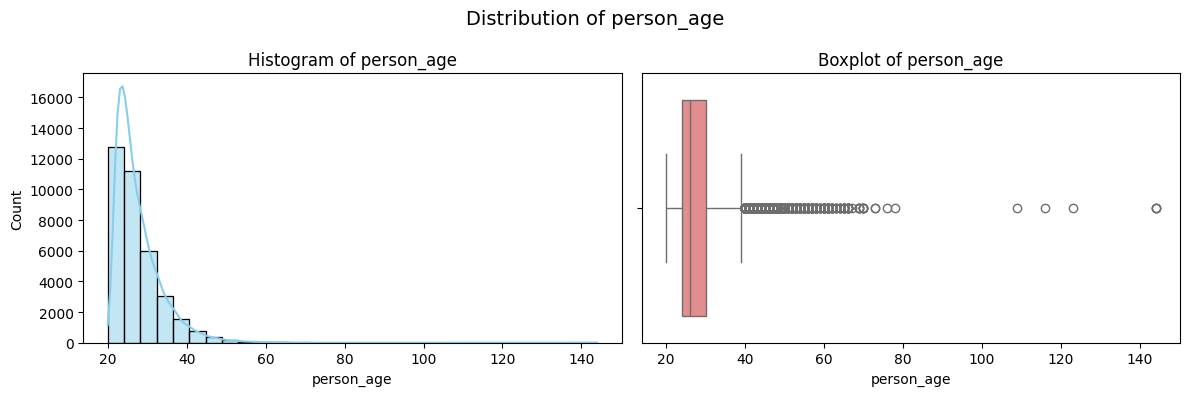

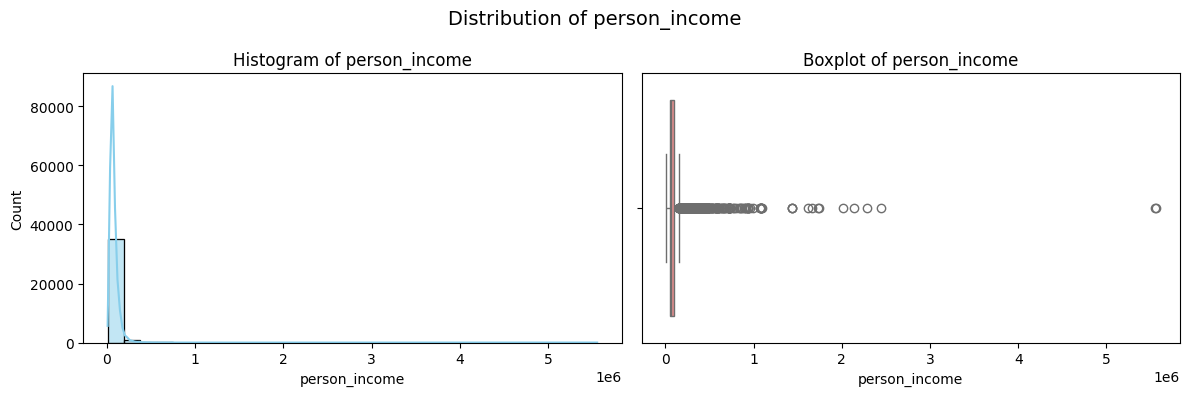

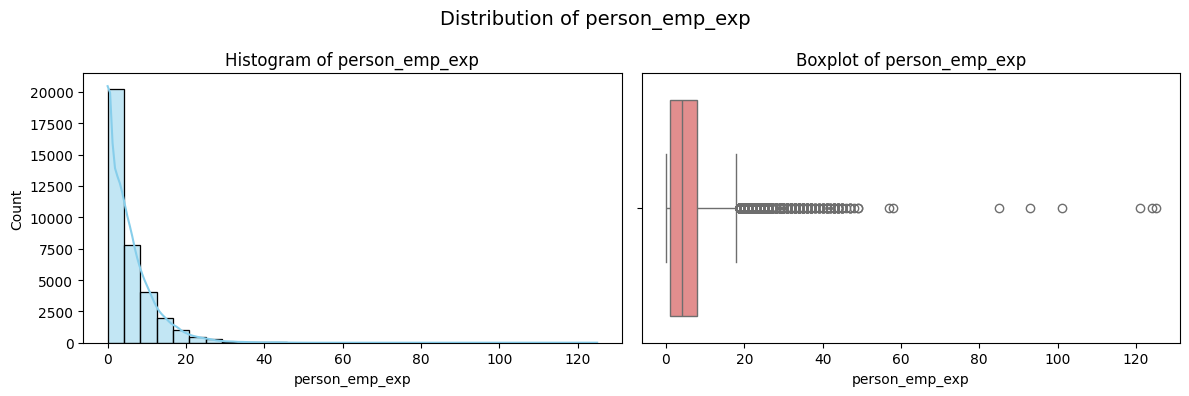

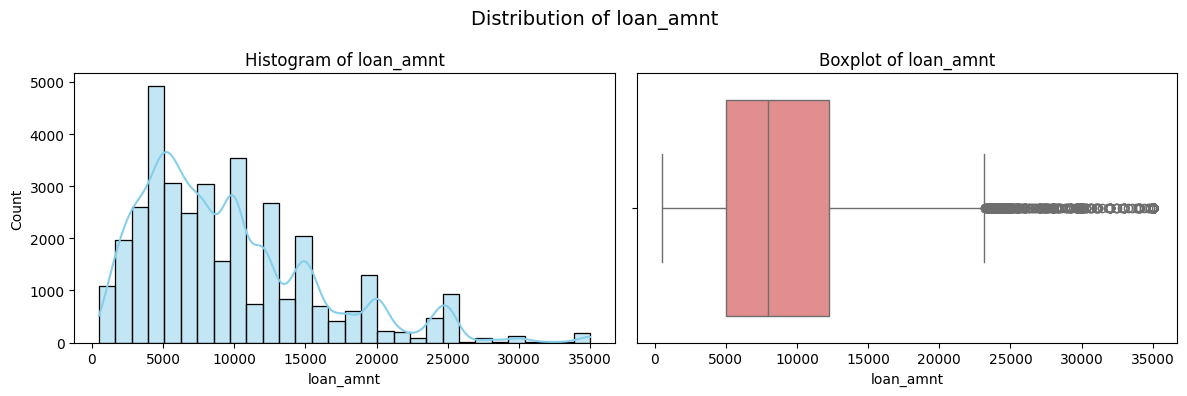

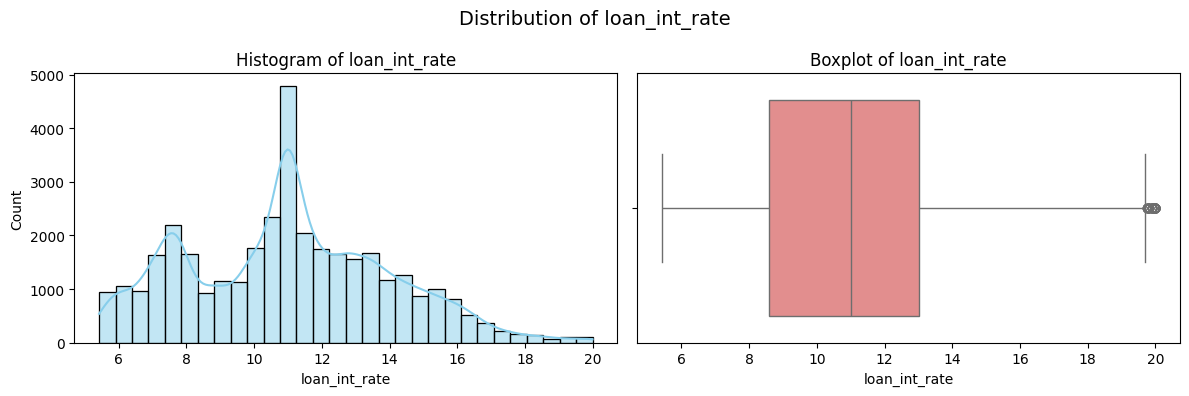

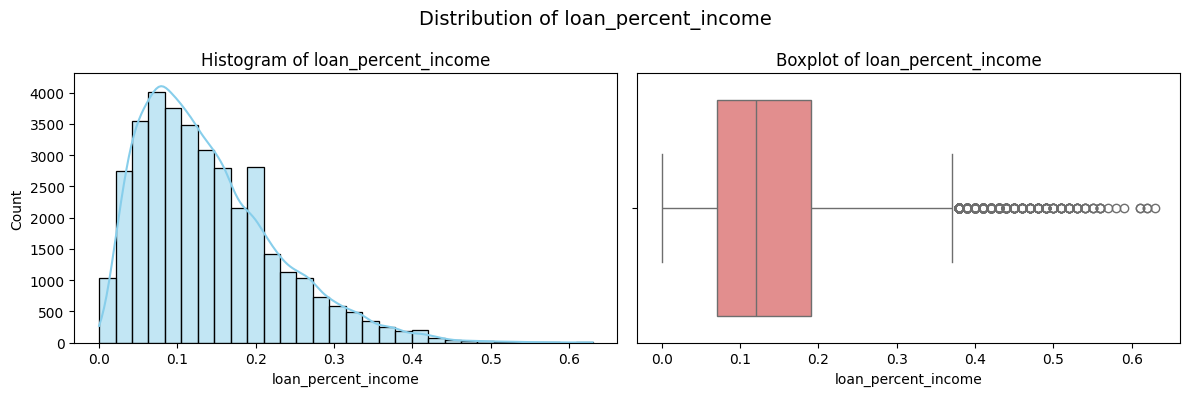

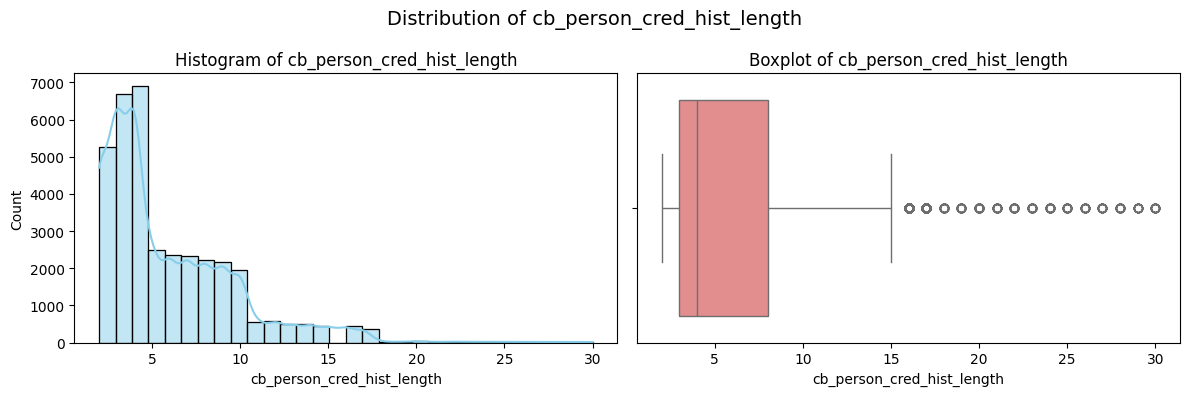

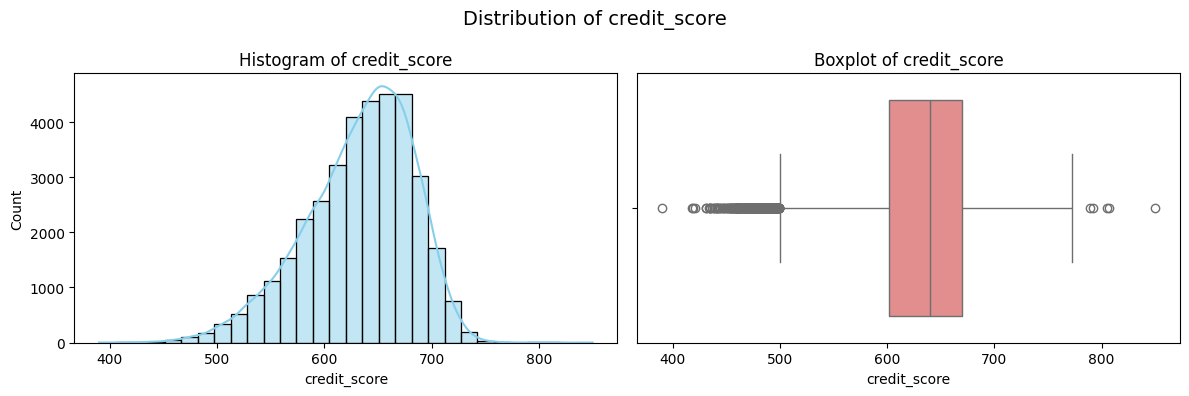

In [68]:
def plot_distributions(df, num_cols):
    for col in num_cols:
        data = df[col].dropna()  # Hilangkan NaN agar tidak error saat plot

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histogram
        sns.histplot(data, bins=30, ax=axes[0], kde=True, color='skyblue')
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)

        # Boxplot
        sns.boxplot(x=data, ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot of {col}')
        axes[1].set_xlabel(col)

        plt.suptitle(f'Distribution of {col}', fontsize=14)
        plt.tight_layout()

plt.show()

plot_distributions(x_train, numerical)

In [69]:
for col in numerical:
    scaler = RobustScaler()

    # Fit-transform untuk train dan transform untuk test
    x_train[[col]] = scaler.fit_transform(x_train[[col]])
    x_test[[col]] = scaler.transform(x_test[[col]])

    # Change robust_scaler to scaler
    pickle.dump(scaler, open(f"{col}_scaler.pkl", "wb")) # Changed this line

print("Kolom sudah disave")

Kolom sudah disave


TRAIN MODEL RF DAN XGB

In [70]:
rf_model= RandomForestClassifier(random_state= 42, criterion= 'gini', max_depth= 4, n_estimators= 100)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [71]:
y_pred_rf= rf_model.predict(x_test)

XGBOOST

In [72]:
xgb_model= XGBClassifier(random_state= 42, n_estimators= 100, min_child_weight= 50, max_depth= 8)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
y_pred_xgb= xgb_model.predict(x_test)

HASIL RF

In [74]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6990
           1       0.97      0.48      0.64      2010

    accuracy                           0.88      9000
   macro avg       0.92      0.74      0.79      9000
weighted avg       0.89      0.88      0.87      9000



HASIL XGBOOST

In [75]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [77]:
#SAVE MODEL XGB KARENA LEBIH BAGUS
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))